## 1. Data processing in R

### 1.1 Getting started

For many people, their first instinct is to open the data with Excel and just manually clean-up the data, by replacing values, creating new columns, etc., entirely by hand. The problem with that approach is that you cannot easily replicate the steps you have taken to transform the raw data into the final format you use for your analyses. This issue has many consequences, but among the two most common are, first, that if you get new or additional data from the same source, you would have to manually perform the same operations again, and second, if you make a mistake it would be difficult to identify where exactly that happened. The best approach is to preprocess your data with a script in the same way you do your analyses. However, doing so in base R can be quite cumbersome. In this tutorial, you will learn how to use tools for the **`tidyverse`** packages. Tidyverse is a collection of useful packages, which include **`ggplot2`**, **`tidyr`**, **`dplyr`**, etc, combined in a single package.

Before we begin, you'll need to install and load the `tidyverse` package:

In [ ]:
# function to install the packages if missing, otherwise, just load them
import_packages <- function(packages) {
    for (package in packages) {
        if (!(package %in% row.names(installed.packages()))) { #if the package is not installed
            install.packages(package, repos = "http://cran.us.r-project.org") #install from archive
        } 
        library(package, character.only = TRUE) #load the set of packages that you gave to the function
    }
}

import_packages(c('tidyverse')) #call the function with tidyverse as the input

Or you can do this: 

```R
install.packages('tidyverse')
library(tidyverse)
```

Below is a summary of the functions we will review and their general description:

* **mutate()** - transforming existing variables and creating new variables
* **summarise()** - summarizing variables
* **filter()** - filtering dataframes
* **select()** - selecting columns to keep/remove
* **arrange()** - sorting by column/columns
* **join()** - merging multiple dataframes
* **group_by()** - performing the same operation to different subgroups of data and combining the results
* **spread()** - transforming data to wide format
* **gather()** - transforming data to long format
* **separate()** - split one column into multiple columns
* **unite()** - combine two columns into one

### 1.2 Basic R Commands

* **Arithmetic**

In R, you can do basic arithmetic just like any other programming language e.g.,

In [ ]:
6+2
10-3*4
5^3

[1] 8

[1] -2

[1] 125

* **Data structures**

Vectors: vectors are lists of numbers or strings. 

In [ ]:
a <- c(1,2,3)
b <- c(4,5,6)
print(paste("mean of vector a:",mean(a)))
print(paste("sum of vector b:",sum(b)))

[1] "mean of vector a: 2"
[1] "sum of vector b: 15"


You can do element-wise operations on two vectors easily:

In [ ]:
a*b

[1]  4 10 18

Data frames: data frames can contain data of mixed types such as numbers and strings. Usually, each column is a different variable (e.g., Age, Test Score), and items within each column are of the same type. 

In [ ]:
c <- c("one","two","three")
data <- data.frame(avar=a,bvar=b,cvar=c)
data

avar,bvar,cvar
<dbl>,<dbl>,<chr>
1,4,one
2,5,two
3,6,three


In the data frame printed above, you can see that both variables **avar** and **bvar** are type **\<dbl\>** (short for "double", another term for numeric) while variable **cvar** is type **\<chr\>**, or "character". 



* **Indexing**

In a vector, you can index data by its position: 

In [ ]:
a[2]

[1] 2

You can index data by its column and row number in a data frame: 

In [ ]:
data[2,1]

[1] 2

You can also index a particular column by its variable name: 

In [ ]:
data$bvar

[1] 4 5 6

Or, you can access a particular column or row by its position in the data frame:

In [ ]:
print("Column 3")
data[,3]

[1] "Column 3"


[1] "one"   "two"   "three"

In [ ]:
print("Row 1")
data[1,]

[1] "Row 1"


,avar,bvar,cvar
,<dbl>,<dbl>,<chr>
1,1,4,one


## 2. Tidy data

The key concept here is called **tidy data**. Tidy data assumes that your data is organized as follows:
* Columns are variables
* Rows are individual observations
* Observation for each variable is stored in the corresponding cell

There are two versions of the tidy data format - long and wide. To illustrate the difference, imagine a repeated measures dataset, where you gather four observations for each subject at four different time points. In the **long data** format, the columns will be *subject*, *timepoint*, and *observation*, where each row will be one observation at a specific timepoint for a specific subject. For example:

In [ ]:
long_data <- data.frame(subject = rep(1:3, each=4),
                        timepoint = rep(1:4, times=3),
                        observation = round(rnorm(12), 2))
long_data

subject,timepoint,observation
<int>,<int>,<dbl>
1,1,0.56
1,2,-0.48
1,3,0.64
1,4,-0.18
2,1,0.38
2,2,0.56
2,3,-1.83
2,4,-0.43
3,1,-0.94


Alternatively, the data can be organized in a **wide format**, in which the four different timepoints are represented as different columns, each row is a single subject, and the observation for each timepoint is stored at a cell within that column. Like this (don't worry about the code for now, it is explained in the subsequent section):

In [ ]:
long_data  %>% 
    mutate(timepoint = paste0('time',timepoint))  %>% 
    spread(timepoint, observation)

subject,time1,time2,time3,time4
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,-0.48,0.64,-0.18
2,0.38,0.56,-1.83,-0.43
3,-0.94,-1.57,1.32,-0.31


## 3. Pipes - the %>% operator

You might have noticed the weird **%>%** operator in the code in the previous section. This operator is called a **'pipe'**. Pipes are present in many programming languages, but not in the base R, so you might not be familiar with them. Pipes are an added feature from the Tidyverse package. 

A pipe serves as a link between two objects, whether they be variables or functions. The pipe tells R to take the object on its left side and pass it as the first argument to the object on the right. 

Typically in R, if you want to pass an argument to a function, you specify it as `function(argument)`. For example, if you want to find the mean of the observations in the example shown above, in base R you would do this:

In [ ]:
mean(long_data$observation)

[1] -0.19

If you use a pipe, you just put the argument on its left side, and the function on the right, i.e., `variable  %>% function()`:

In [ ]:
long_data$observation  %>% mean()

[1] -0.19

Now, you might be asking, why would you want to use **x %>% mean()** instead of **mean(x)**? Pipes come in handy, particularly when you have to run a series of functions on the same input. For example, let's say you want to find the mean of the observations, and then round the value to 2 significant digits. In base R, you can do this in two ways:

1. nest the functions within one another
2. assign a temporary variable for the mean, and then round that value

In [ ]:
# nested
round(mean(long_data$observation), 2)

# tmp variable
obs_mean = mean(long_data$observation)
round(obs_mean, 2)

[1] -0.19

[1] -0.19

Since pipes take the output of the expression on the left and send it as the first input to the expression on the right, you can do the following with pipes:

In [ ]:
# with pipes
long_data$observation  %>% mean()  %>% round(2)

[1] -0.19

This reads smoothly from left to right as, "Take the observations, find the mean and then round it to two decimals." To increase readability even further, you can put a new row after each pipe operator - R automatically assumes that if there is nothing after the %>% on the same row, it should pass the result to whatever comes on the next row. Thus, we can rewrite the above example as:

In [ ]:
# pipes on separate rows:
long_data$observation  %>% 
  mean() %>% 
  round(2)

[1] -0.19

Notice that typically the `round()` function takes as first argument the value to be rounded, and as a second argument the number of digits to which to round. When you use a pipe, the first argument is implicitely filled in with the value on the left, so the first argument you actually type corresponds to the number of significant digits to which to round. 

Pipes become very useful when using the functions we'll discuss below, because you would usually use many of them on the same data, and while the above example might be easy to read in all three cases, it becomes very difficult to track what is going on with the base R approach. **Thus pipes have two advantages:**

1. **Readability** - it is easier to see what goes on, because you can track the sequence naturally left to right. In contrast, with nested functions, you have to identify the inner-most function and then work your way outwards.
2. **Efficiency** - do not clutter your environment with temporary variables that you needed for only one intermediary observation.

To show the difference in readability, here is how the code for the long to wide functions would look if we wrote it with nested functions, rather than with pipes:

In [ ]:
# with pipes
long_data  %>% 
    mutate(timepoint = paste0('time',timepoint))  %>% 
    spread(timepoint, observation)

# nested functions
spread(mutate(long_data, timepoint = paste0('time',timepoint)), timepoint, observation)

# temporary variables
mutated_data <- mutate(long_data, timepoint = paste0('time',timepoint))
spread(mutated_data, timepoint, observation)

subject,time1,time2,time3,time4
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,-0.48,0.64,-0.18
2,0.38,0.56,-1.83,-0.43
3,-0.94,-1.57,1.32,-0.31


subject,time1,time2,time3,time4
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,-0.48,0.64,-0.18
2,0.38,0.56,-1.83,-0.43
3,-0.94,-1.57,1.32,-0.31


subject,time1,time2,time3,time4
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56,-0.48,0.64,-0.18
2,0.38,0.56,-1.83,-0.43
3,-0.94,-1.57,1.32,-0.31


## 4. Transforming data

We will use the `iris` dataset for illustrating the tidyverse functions. You can save it to a `dat` variable like this:

In [ ]:
dat <- iris
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The `iris` dataset contains [measurement data](https://eloquentarduino.github.io/2019/12/iris-classification-on-arduino/) for different species of iris flowers. You can view a detailed description of the dataset by typing:

In [ ]:
?iris

Here's a peak at the data:

In [ ]:
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### 4.1 Transforming existing variables and creating new variables -  **mutate()**

`mutate()` is part of `dplyr`, one of the packages included in `tidyverse` that is handy for data manipulation. The `mutate()` command allows you to create new columns, i.e. new variables.  Let's say you want to center the sepal lengths in the `iris` dataset by removing the mean:

In [ ]:
dat <- mutate(dat, centered_SepLen = Sepal.Length - mean(Sepal.Length))
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333
2,4.9,3.0,1.4,0.2,setosa,-0.9433333
3,4.7,3.2,1.3,0.2,setosa,-1.1433333
4,4.6,3.1,1.5,0.2,setosa,-1.2433333
5,5.0,3.6,1.4,0.2,setosa,-0.8433333
6,5.4,3.9,1.7,0.4,setosa,-0.4433333


**In all `dplyr` commands, including `mutate`, the first argument is always the dataset**, and after that you can specify what new variables you want to create using `variable_name = value`. All commands in the `dplyr` package allow you to create and reference variables within a data.frame object, without needing to type in the name of the data.frame each time. For example, if you want to create several variables in base R (that is, without using `dplyr` functions), you would have to do this everytime:

In [ ]:
# center sepal length
dat$centered_SepLen = dat$Sepal.Length - mean(dat$Sepal.Length) 
# transforms petal length into zscores
dat$PetLen_zscores = (dat$Petal.Length - mean(dat$Petal.Length))/sd(dat$Petal.Length)

Using `dplyr`, you don't have to write `dat$` every time you refer to a variable:

In [ ]:
dat <- dat  %>%  
    mutate(centered_SepLen = Sepal.Length - mean(Sepal.Length),  # center Sepal Lengths
           PetLen_zscores = (Petal.Length - mean(Petal.Length))/sd(Petal.Length),  # zscore the Petal Lengths
           n_flowers = length(Species))              # calculate the total number of flowers
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150


As you see, you can create multiple variables at the same time within a single mutate command, by separating them with commas. This time, rather than specifying *dat* as the first argument of mutate explicitely, we directed it with a pipe, as explained before. The first line should be read as *'Pass the dat variable to whatever follows, then save the results in the dat variable.'*

### 4.2 Summarizing variables - summarise()

`Mutate()` creates new variables within the existing dataset and does not change the number of rows. You might also want to calculate statistics that summarize the whole data set. For example, in the example above I calculated how many flowers were measured total (`n_flowers`) - but it doesn't really make sense to output this as a variable with entries for every observation. If you want to create a new data.frame in which you store the summary values for one or more variables, you can use the `summarise()` command. Let's get summaries for a few of the existing variables:

In [ ]:
smry <- dat  %>% 
    summarise(n_flowers = length(Species), # how many observations (flowers) are there total? 
              shortSepal_prop = mean(centered_SepLen < 0), # what proportion of these flowers have smaller-than-average sepal length?
              setosa_prop = mean(Species == 'setosa'), # what proportion of measured flowers are species Setosa?
              SepLen_mean = mean(Sepal.Length), # mean sepal length
              SepLen_sd = sd(Sepal.Length), # standard deviation of sepal length
              SepLen_se = SepLen_sd / sqrt(n_flowers)
              )
smry
              

n_flowers,shortSepal_prop,setosa_prop,SepLen_mean,SepLen_sd,SepLen_se
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150,0.5333333,0.3333333,5.843333,0.8280661,0.06761132


You should note several things. When you get to a new row, you can refer to a variable you have already created on a previous row. For example, when we calculate the standard error for `Sepal.Length`, we have put `SepLen_se = SepLen_sd / sqrt(n_flowers)`, in which SepLen_sd and n_flowers do not exist in the original data.frame, but are variables that we created on previous rows. We could have written it directly as `SepLen_se = sd(Sepal.Length) / sqrt(length(Species))`, but doing it in the above way is more efficient and readable.

### 4.3 Filtering a data.frame by removing rows based on a condition - filter()

Here are three scenarios:
* you find that there was an error with data collection for one species of flower (e.g. setosa) and you want to remove it from the data.frame
* you find out that some flowers have a negative `Sepal.Length` value, which is an error, and you want to remove them
* you want to separate the data for the remaining two species into separate datasets

You can do all of these things with the **`filter`** command:

In [ ]:
print(paste('species options:',paste(levels(dat$Species),collapse=", ")))

# get rid of all setosa flowers and any flowers with negative sepal lengths
cleaned_dat <- dat  %>% 
    filter(Species != 'setosa',
           Sepal.Length >= 0)

# make new data.frames for the remaining two species
versi.dat <- filter(cleaned_dat, Species == 'versicolor')
virgi.dat <- filter(cleaned_dat, Species == 'virginica')

# look at first six rows of all three data.frames
head(cleaned_dat); head(versi.dat); head(virgi.dat)

[1] "species options: setosa, versicolor, virginica"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,7.0,3.2,4.7,1.4,versicolor,1.1566667,0.5336209,150
2,6.4,3.2,4.5,1.5,versicolor,0.5566667,0.4203256,150
3,6.9,3.1,4.9,1.5,versicolor,1.0566667,0.6469162,150
4,5.5,2.3,4.0,1.3,versicolor,-0.3433333,0.1370873,150
5,6.5,2.8,4.6,1.5,versicolor,0.6566667,0.4769732,150
6,5.7,2.8,4.5,1.3,versicolor,-0.1433333,0.4203256,150


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,7.0,3.2,4.7,1.4,versicolor,1.1566667,0.5336209,150
2,6.4,3.2,4.5,1.5,versicolor,0.5566667,0.4203256,150
3,6.9,3.1,4.9,1.5,versicolor,1.0566667,0.6469162,150
4,5.5,2.3,4.0,1.3,versicolor,-0.3433333,0.1370873,150
5,6.5,2.8,4.6,1.5,versicolor,0.6566667,0.4769732,150
6,5.7,2.8,4.5,1.3,versicolor,-0.1433333,0.4203256,150


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,6.3,3.3,6.0,2.5,virginica,0.45666667,1.2700404,150
2,5.8,2.7,5.1,1.9,virginica,-0.04333333,0.7602115,150
3,7.1,3.0,5.9,2.1,virginica,1.25666667,1.2133927,150
4,6.3,2.9,5.6,1.8,virginica,0.45666667,1.0434497,150
5,6.5,3.0,5.8,2.2,virginica,0.65666667,1.1567451,150
6,7.6,3.0,6.6,2.1,virginica,1.75666667,1.6099263,150


Here's where the pipe becomes useful. Let's say you want to calculate the summarise we described above separately for the versicolor and virginica species. I will show you later how to do it more efficiently, but for the moment we can illustrate how you can chain commands with pipes. Rather than creating the intermediate `versi.dat` and `virgi.dat` dataframes, we can chain the `summarise` function after the `filter` function. In the example below, we pass `dat` as the first argument of `filter`, then specify to keep only versicolor flowers, and then the resulting data.frame is passed on as the first argument to summarise:

In [ ]:
# calculate summarise for versicolor species
dat  %>% 
 filter(Species == 'versicolor')  %>% 
 summarise(SepLen_mean = mean(Sepal.Length),
           SepLen_sd = sd(Sepal.Length))

# calculate summarise for virginica species
dat  %>% 
 filter(Species == 'virginica')  %>% 
 summarise(SepLen_mean = mean(Sepal.Length),
           SepLen_sd = sd(Sepal.Length))

SepLen_mean,SepLen_sd
<dbl>,<dbl>
5.936,0.5161711


SepLen_mean,SepLen_sd
<dbl>,<dbl>
6.588,0.6358796


**_TIP_**: it is very easy to remove missing values by using the !is.na(variable) command. E.g. if some flowers are missing petal length measurements, you can exclude them by doing **`filter(dat, !is.na(Petal.Length))`**

### 4.4 Removing/selecting columns to keep - select()

Often the dataset contains many irrelevant columns that make it difficult to display the dataframe all at once. You can easily choose which columns to keep or remove in a data.frame with the **`select()`** command. It has complex usage, and I suggest checking the help, i.e. type `?select`. However, the basic usage is as follows: 

In [ ]:
select(dat, Species, Petal.Length, Petal.Width)  %>% head() #to keep only specific variables, list them one after another like this

,Species,Petal.Length,Petal.Width
,<fct>,<dbl>,<dbl>
1,setosa,1.4,0.2
2,setosa,1.4,0.2
3,setosa,1.3,0.2
4,setosa,1.5,0.2
5,setosa,1.4,0.2
6,setosa,1.7,0.4


* If you want to **remove** only specific variables, list each with a **-** sign:

In [ ]:
select(dat, -Sepal.Length, -Sepal.Width)  %>% head() #remove original sepal length & width variables

,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,1.4,0.2,setosa,-0.7433333,-1.335752,150
2,1.4,0.2,setosa,-0.9433333,-1.335752,150
3,1.3,0.2,setosa,-1.1433333,-1.392399,150
4,1.5,0.2,setosa,-1.2433333,-1.279104,150
5,1.4,0.2,setosa,-0.8433333,-1.335752,150
6,1.7,0.4,setosa,-0.4433333,-1.165809,150


* If you want to keep a sequence of variables, you can specify the first and the last using a range:

In [ ]:
# look at full data set
head(dat)
# look at just a certain range of variables
select(dat, Sepal.Length:Species)  %>% head()  #note that this is an inclusive range - the first and last variables are included

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### 4.5 Sorting the data.frame by columns - arrange()

If you want to sort your data.frame by one or more columns you can use the `arrange()` command, where you list the variables in the order in which you want the sorting to occur. The default is to sort by ascending order for each variable. If you want to sort by descending order for one of them, you can surround the variable in the `desc()` command. Let's sort the flowers by species, and then within each species, by descending petal length:

In [ ]:
arrange(dat, Species, desc(Petal.Length))  %>% head()

# arrange(dat, desc(Species), desc(Petal.Length)) %>% head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,4.8,3.4,1.9,0.2,setosa,-1.0433333,-1.052513,150
2,5.1,3.8,1.9,0.4,setosa,-0.7433333,-1.052513,150
3,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150
4,5.7,3.8,1.7,0.3,setosa,-0.1433333,-1.165809,150
5,5.4,3.4,1.7,0.2,setosa,-0.4433333,-1.165809,150
6,5.1,3.3,1.7,0.5,setosa,-0.7433333,-1.165809,150


Note: since the `Species` variable is a factor, not a numeric variable, it will be sorted by the order listed by `levels(dat$Species)`. You can test this out by uncommenting the second line in the code cell above - since the flowers are now sorted in the reverse `Species` order, the first six rows shown by `head()` are now virginica, not setosa. 

### 4.6 combine/concatenate values from two columns into one - unite()

Let's say flowers with short petals are fundamentally different from those with long petals. I'm going to make a new categorical variable, `PetalType`, that can either be "long" or "short". *To learn more about the `ifelse()` function used below, type `?ifelse`.*

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<chr>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150,short
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150,short
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150,short
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150,short
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150,short
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150,short


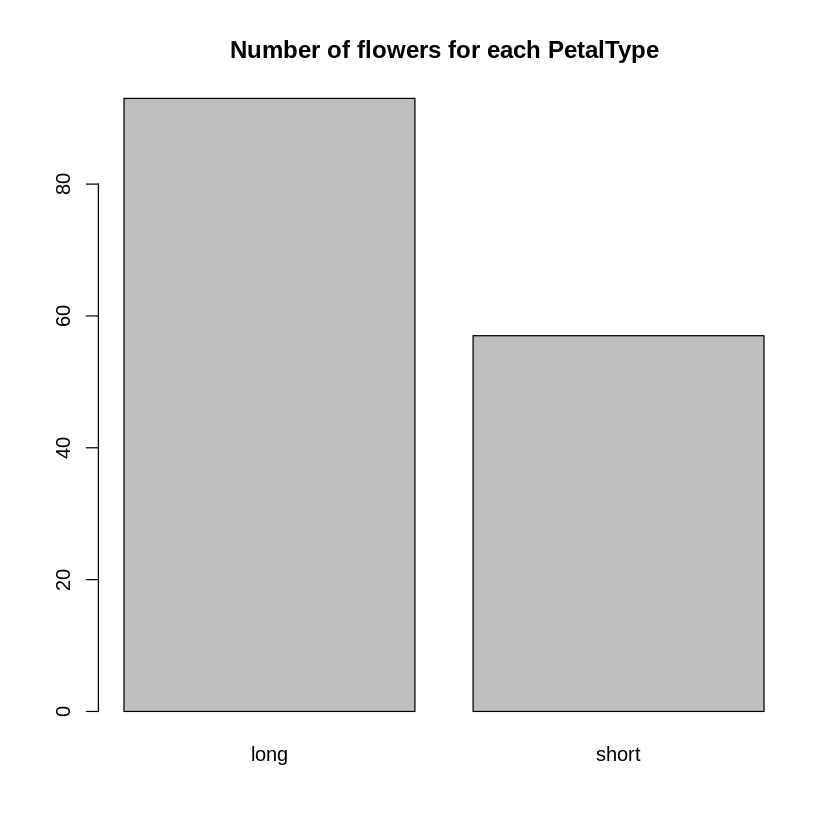

In [ ]:
dat <- dat  %>%  
    mutate(PetalType = ifelse(Petal.Length > mean(Petal.Length),"long","short"))

barplot(table(dat$PetalType),main="Number of flowers for each PetalType")

head(dat)


Right now `Species` and `PetalType` are two different variables. Let's say for some reason you want a new variable that specifies both, e.g. 'short virginica', 'long setosa', etc. This is often useful when you are plotting and you want to use a color to denote each combination of two variables, instead of using a combination of colors and shapes. You can combine variables with the `unite()` command.

In [ ]:
dat <- dat %>% 
      unite(Combined_var, Species, PetalType, remove=FALSE)
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Combined_var,Species,centered_SepLen,PetLen_zscores,n_flowers,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<int>,<chr>
1,5.1,3.5,1.4,0.2,setosa_short,setosa,-0.7433333,-1.335752,150,short
2,4.9,3.0,1.4,0.2,setosa_short,setosa,-0.9433333,-1.335752,150,short
3,4.7,3.2,1.3,0.2,setosa_short,setosa,-1.1433333,-1.392399,150,short
4,4.6,3.1,1.5,0.2,setosa_short,setosa,-1.2433333,-1.279104,150,short
5,5.0,3.6,1.4,0.2,setosa_short,setosa,-0.8433333,-1.335752,150,short
6,5.4,3.9,1.7,0.4,setosa_short,setosa,-0.4433333,-1.165809,150,short


With `mutate()`, you can also specify the separator (by default it is '\_') and whether to remove the original variables. Check the help section for more on how to do this (`?unite`). Note that in the commented section of the cell above, I generated the new variable and the combined variable all at once. 

### 4.7 split variable into multiple variables - separate()

The reverse of the operation above is called `separate()`. It becomes useful, for example, if you have the name of participants stored in one variable, but you want to separate it into First and Last name. For the illustration, I will just reverse the above example (adding 1 to the new variables, to distinguish them from the existing Species and PetalType variables):

In [ ]:
dat <- dat  %>% 
    separate(Combined_var, into=c('Species1', 'PetalType1')) #separate the combined variable into the two original variables. 
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species1,PetalType1,Species,centered_SepLen,PetLen_zscores,n_flowers,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<int>,<chr>
1,5.1,3.5,1.4,0.2,setosa,short,setosa,-0.7433333,-1.335752,150,short
2,4.9,3.0,1.4,0.2,setosa,short,setosa,-0.9433333,-1.335752,150,short
3,4.7,3.2,1.3,0.2,setosa,short,setosa,-1.1433333,-1.392399,150,short
4,4.6,3.1,1.5,0.2,setosa,short,setosa,-1.2433333,-1.279104,150,short
5,5.0,3.6,1.4,0.2,setosa,short,setosa,-0.8433333,-1.335752,150,short
6,5.4,3.9,1.7,0.4,setosa,short,setosa,-0.4433333,-1.165809,150,short


Like with `unite()`, you can specify the character you want `separate()` to split. For example, splitting at " " instead of at the default "_" for the First, Last name example. See `?separate` for more info.

## 5. Performing the same operation for multiple groups and combining the results

In the filtering example in section 4.3, we saw how to subset the data.frame separately for different species, and then to calculate the summaries. This is inefficient and also creates two separate data.frames. While you can join them manually afterwards, there is a much easier way with the **`group_by`** command.

When you pass a data.frame to a **group_by** command, you can specify names of variables, by which to split the data.frame. For example, if we specify the `Species` and `PetalType` variables in the group_by command, the data.frame will be **_implicitly_** split into 4 data.frames - one for each combination of species and petal type (note that there are only 2 species for `cleaned_dat` now because we got rid of the "setosa" species in section 4.3). E.g.:

In [ ]:
cleaned_dat <- cleaned_dat  %>%  
    mutate(PetalType = ifelse(Petal.Length > mean(Petal.Length),"long","short")) # this creates the PetalType variable for cleaned_dat

cleaned_dat %>% 
    group_by(Species, PetalType)  %>% # group them by the
    print()

# A tibble: 100 x 9
# Groups:   Species, PetalType [4]
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species centered_SepLen
          <dbl>       <dbl>        <dbl>       <dbl> <fct>             <dbl>
 1          7           3.2          4.7         1.4 versic…           1.16 
 2          6.4         3.2          4.5         1.5 versic…           0.557
 3          6.9         3.1          4.9         1.5 versic…           1.06 
 4          5.5         2.3          4           1.3 versic…          -0.343
 5          6.5         2.8          4.6         1.5 versic…           0.657
 6          5.7         2.8          4.5         1.3 versic…          -0.143
 7          6.3         3.3          4.7         1.6 versic…           0.457
 8          4.9         2.4          3.3         1   versic…          -0.943
 9          6.6         2.9          4.6         1.3 versic…           0.757
10          5.2         2.7          3.9         1.4 versic…          -0.643
# … with 90 more rows

Now, the key is that the split is implicit - as you can see above, we still only have one data.frame, but now it has the specification:

`# Groups:   Species, PetalType [4]`

Every function that you add after `group_by()`, will be evaluated separately for each group, and then the results will be combined. Let's say you want to calculate the mean and sd for `Sepal.Length` and `Sepal.Width` separately for the four groups:

In [ ]:
cleaned_dat  %>% 
    group_by(Species, PetalType)  %>% 
    summarise(SepLen_mean = mean(Sepal.Length),
              SepLen_sd = sd(Sepal.Length),
              SepWid_mean = mean(Sepal.Width),
              SepWid_sd = sd(Sepal.Length))

`summarise()` regrouping output by 'Species' (override with `.groups` argument)



Species,PetalType,SepLen_mean,SepLen_sd,SepWid_mean,SepWid_sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
versicolor,long,6.350000,0.4949747,2.850000,0.4949747
versicolor,short,5.918750,0.5147428,2.766667,0.5147428
virginica,long,6.688636,0.5851718,2.997727,0.5851718
virginica,short,5.850000,0.5244044,2.800000,0.5244044


And that's all the code you need. If you have tried to do something like this in base R (i.e., without `dplyr` commands), you know how involved it is! `dplyr` can make your code **much** cleaner. What is going on behind the scenes is that the data.frame is separated into multiple data.frames, one for each combination of variables. Then the `summarise` function is executed on each, and the resulting 4 data.frames are automatically combined into a new resulting data.frame.

The `group_by` command works not only with `summarise`, but also with `mutate`. While with `summarise` it creates a new data.frame with summary results, with `mutate` it creates a new variable that is calculated separately for each group, and then combined into the final data.frame. This is useful, when, for example, we want to standardize variables within groups. Earlier we saw how to remove the overall mean of `Sepal.Length`. Let's say that we want to remove the mean `Sepal.Length` of each species from only from the flowers in that species. So, for our example we can do:

In [ ]:
dat  %>% 
 mutate(SepLen_centered_overall = Sepal.Length - mean(Sepal.Length))  %>% #center values by mean for all data
 group_by(Species)  %>% 
 mutate(SepLen_centered_byspecies = Sepal.Length - mean(Sepal.Length))  %>% #center values by mean for each species
 # select(SepLen_centered_overall:SepLen_centered_byspecies) %>% # just show the relevant variables (there are a lot of variables in this data.frame now!)
 head()

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species1,PetalType1,Species,centered_SepLen,PetLen_zscores,n_flowers,PetalType,SepLen_centered_overall,SepLen_centered_byspecies
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>
5.1,3.5,1.4,0.2,setosa,short,setosa,-0.7433333,-1.335752,150,short,-0.7433333,0.094
4.9,3.0,1.4,0.2,setosa,short,setosa,-0.9433333,-1.335752,150,short,-0.9433333,-0.106
4.7,3.2,1.3,0.2,setosa,short,setosa,-1.1433333,-1.392399,150,short,-1.1433333,-0.306
4.6,3.1,1.5,0.2,setosa,short,setosa,-1.2433333,-1.279104,150,short,-1.2433333,-0.406
5.0,3.6,1.4,0.2,setosa,short,setosa,-0.8433333,-1.335752,150,short,-0.8433333,-0.006
5.4,3.9,1.7,0.4,setosa,short,setosa,-0.4433333,-1.165809,150,short,-0.4433333,0.394


The second line above gives us the sepal lengths centered over the whole sample, while the 4th line, even though it looks the same, gives us the sepal lengths centered separately for each species. To illustrate, I will plot the means for each species under the two centerings (don't worry about the code if you don't know `ggplot2` yet):

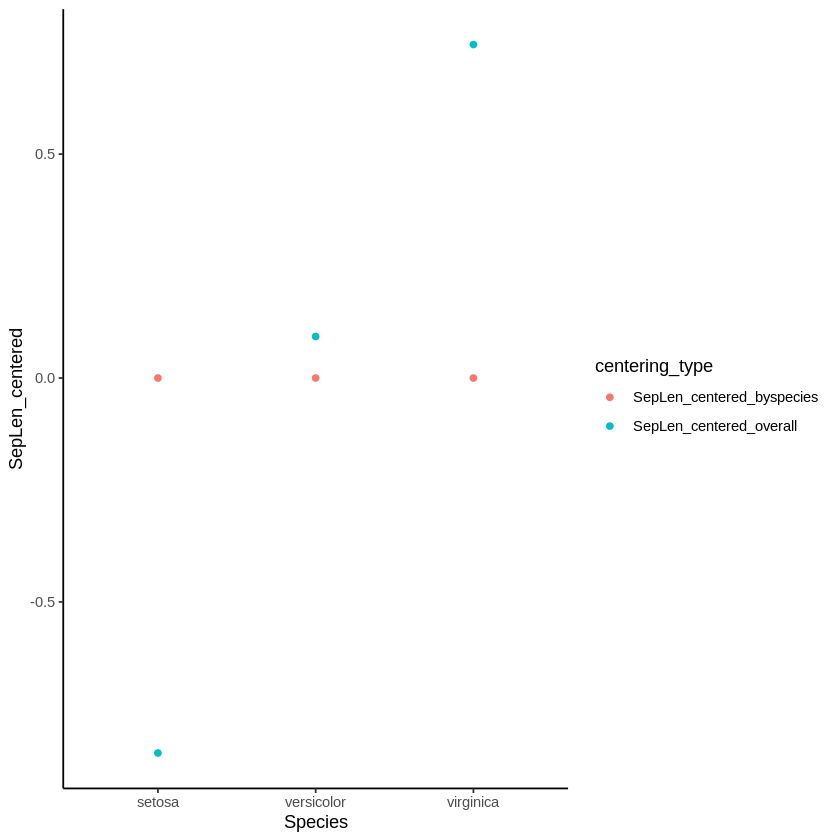

In [ ]:
dat  %>% 
 mutate(SepLen_centered_overall = Sepal.Length - mean(Sepal.Length))  %>% #center values by mean for all data
 group_by(Species)  %>% 
 mutate(SepLen_centered_byspecies = Sepal.Length - mean(Sepal.Length))  %>% 
 gather(key = centering_type, value = SepLen_centered, SepLen_centered_overall, SepLen_centered_byspecies)  %>% 
 ggplot(aes(Species, SepLen_centered, color=centering_type)) +
    stat_summary(geom='point',fun=mean) +
    theme_classic()

This plot makes sense, because if you're calculating `SepLen_centering_byspecies` by subtracting the species mean from each `Sepal.Length` value, the mean of the new values should be 0 for every species. Meanwhile, the `SepLen_centering_overall` values were calculated by subtracting the same amount from all `Sepal.Length` values, regardless of species, so we still see variation for these means across species.

There are a lot of other handy uses for `group_by`, which will be covered in future tutorials. 

## 6. Restructuring data.frames - long to wide, wide to long, and merging data.frames.

Remember how in section 2 we talked about how it's better to have a single observation in each row, instead of multiple observations per row? In this section we'll use the `dplyr` functions `gather` and `spread` to switch between short and long forms of the data. We'll also try out combining data.frames using `join`. 

The `iris` data set has multiple measurements per row, so it is currently in the "wide" format. To put it in long format, we can make each row only have one measurement, and then variables that specify whether that measurment is for "sepal" or "petal", "length" or "width". 

In [ ]:
newdat <- iris # new duplicate of iris dataset so we don't have to deal with all the messy variables we created.
newdat$flower.num <- 1:nrow(newdat) # like a participant ID, so we can put these back where they came from using "spread."
newdat <- newdat %>%
      gather(key="flower_att",value="measurement",
      Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)
head(newdat)




,Species,flower.num,flower_att,measurement
,<fct>,<int>,<chr>,<dbl>
1,setosa,1,Sepal.Length,5.1
2,setosa,2,Sepal.Length,4.9
3,setosa,3,Sepal.Length,4.7
4,setosa,4,Sepal.Length,4.6
5,setosa,5,Sepal.Length,5.0
6,setosa,6,Sepal.Length,5.4


Now this data set is in a long format, which is a tidier format for answering analysis questions ("Are petals longer than they are wide?") and for visualization. If I wanted to, I could use `separate()` to make the `flower_att` variable into two variables. We can also easily put it back in "wide" format using `spread`:

In [ ]:
newdat <- newdat %>%
      spread(flower_att,measurement)
head(newdat)

,Species,flower.num,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,setosa,1,1.4,0.2,5.1,3.5
2,setosa,2,1.4,0.2,4.9,3.0
3,setosa,3,1.3,0.2,4.7,3.2
4,setosa,4,1.5,0.2,4.6,3.1
5,setosa,5,1.4,0.2,5.0,3.6
6,setosa,6,1.7,0.4,5.4,3.9


The last function we'll cover in this tutorial is the `left_join()` function. Imagine that you saved your data so that personal information such as age was saved separately from your participants' response data. However, now you want to see if age impacts your effect size, and you'd like to add age as a variable in your main dataset. As long as both your response dataset and your personal information dataset have the participant ID in them, you should be able to add the participants' ages to the dataset easily using `left_join()`. See [this page](https://dplyr.tidyverse.org/reference/join.html) for more versions of the `join()` function that you can use to make merging datasets easier.

In [ ]:
personal <- data.frame(name = c("p01","p02"), age = c(18,21), firstlang = c("English", "Chinese")) # participant inforation
response <- data.frame(name= c("p01","p01","p02","p02"),response=c(0,1,1,0)) # response database
head(response)

response <- response %>% left_join(select(personal,name:age)) # don't need to use "select", but it keeps you from adding info you don't need. 
head(response)

,name,response
,<chr>,<dbl>
1,p01,0
2,p01,1
3,p02,1
4,p02,0


Joining, by = "name"



,name,response,age
,<chr>,<dbl>,<dbl>
1,p01,0,18
2,p01,1,18
3,p02,1,21
4,p02,0,21


That's all the tidyverse functions we'll cover for now!

*notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, and Patience Stevens*